# Reducing to a Minimum Spanning Tree

## Creating a minimum spanning tree example

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

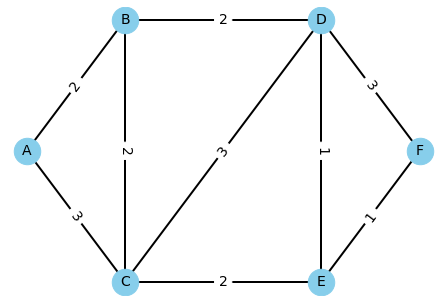

In [2]:
graph = {'A': {'B':2, 'C':3},
         'B': {'A':2, 'C':2, 'D':2},
         'C': {'A':3, 'B':2, 'D':3, 'E':2},
         'D': {'B':2, 'C':3, 'E':1, 'F':3},
         'E': {'C':2, 'D':1, 'F':1},
         'F': {'D':3, 'E':1}}

Graph = nx.Graph()
for node in graph:
    Graph.add_nodes_from(node)
    for edge, weight in graph[node].items():
        Graph.add_edge(node,edge, weight=weight)

pos = { 'A': [0.00, 0.50], 'B': [0.25, 0.75],
        'C': [0.25, 0.25], 'D': [0.75, 0.75],
        'E': [0.75, 0.25], 'F': [1.00, 0.50]}

draw_params = {'with_labels':True,
               'arrows': True,
               'node_color':'skyblue',
               'node_size':700, 'width':2, 
               'font_size':14}

labels = nx.get_edge_attributes(Graph,'weight')
nx.draw(Graph, pos, **draw_params)
nx.draw_networkx_edge_labels(Graph, pos, 
                             font_size=14,
                             edge_labels=labels)
plt.show()

## Introducing priority queues

In [3]:
from heapq import heapify, heappop, heappush

class priority_queue():
    def __init__(self):
        self.queue = list()
        heapify(self.queue)
        self.index = dict()
    def push(self, priority, label):
        if label in self.index:
            self.queue = [(w,l) 
                for w,l in self.queue if l!=label]
            heapify(self.queue)
        heappush(self.queue, (priority, label))
        self.index[label] = priority 
    def pop(self):
        if self.queue:
            return heappop(self.queue)
    def __contains__(self, label):
        return label in self.index
    def __len__(self):
        return len(self.queue)

## Leveraging Prim’s algorithm

In [4]:
def prim(graph, start):
    treepath = {}
    total = 0
    queue = priority_queue()
    queue.push(0 , (start, start))
    while queue:
        weight, (node_start, node_end) = queue.pop()
        if node_end not in treepath:
            treepath[node_end] = node_start
            if weight:
                print("Added edge from %s" \
                      " to %s weighting %i"
                      % (node_start, node_end, weight))
                total += weight
            for next_node, weight \
            in graph[node_end].items():
                queue.push(weight , (node_end, next_node))
    print("Total spanning tree length: %i" % total)
    return treepath

treepath = prim(graph, 'A')

Added edge from A to B weighting 2
Added edge from B to C weighting 2
Added edge from B to D weighting 2
Added edge from D to E weighting 1
Added edge from E to F weighting 1
Total spanning tree length: 8


In [5]:
def represent_tree(treepath):
    progression = list()
    for node in treepath:
        if node != treepath[node]:
            progression.append((treepath[node], node))
    return sorted(progression, key=lambda x:x[0])

In [6]:
print(represent_tree(treepath))

[('A', 'B'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('E', 'F')]


## Testing Kruskal’s algorithm

In [7]:
def kruskal(graph):
    priority = priority_queue()
    print("Pushing all edges into the priority queue")
    treepath = list()
    connected = dict()
    for node in graph:
        connected[node] = [node]
        for dest, weight in graph[node].items():
            priority.push(weight, (node,dest))
    print("Totally %i edges" % len(priority))
    print("Connected components: %s" 
           % connected.values())
    
    total = 0
    while len(treepath) < (len(graph)-1):
        (weight, (start, end)) = priority.pop()
        if end not in connected[start]:
            treepath.append((start, end))
            print("Summing %s and %s components:" 
                   % (connected[start],connected[end]))
            print("\tadded edge from %s " \
                   "to %s weighting %i" 
                   % (start, end, weight))
            total += weight
            connected[start] += connected[end][:]
            for element in connected[end]:
                connected[element]= connected[start]
    print("Total spanning tree length: %i" % total)
    return sorted(treepath, key=lambda x:x[0])

print('\nMinimum spanning tree: %s' % kruskal(graph))

Pushing all edges into the priority queue
Totally 18 edges
Connected components: dict_values([['A'], ['B'], ['C'], ['D'], ['E'], ['F']])
Summing ['D'] and ['E'] components:
	added edge from D to E weighting 1
Summing ['D', 'E'] and ['F'] components:
	added edge from E to F weighting 1
Summing ['A'] and ['B'] components:
	added edge from A to B weighting 2
Summing ['A', 'B'] and ['C'] components:
	added edge from B to C weighting 2
Summing ['A', 'B', 'C'] and ['D', 'E', 'F'] components:
	added edge from B to D weighting 2
Total spanning tree length: 8

Minimum spanning tree: [('A', 'B'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('E', 'F')]
